# Car store problem from DM RL course

1. Evaluate policy pi
2. Improve pi greedily

In [1]:
from functools import partial
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm

In [2]:
reward = 10
cost_move = 2
gamma = 0.9
max_cars = 20

In [3]:
poisson_p = lambda k, l: l**k * np.exp(-l) / np.math.factorial(k)
poisson_p_range = lambda l: [poisson_p(l=l, k=k) for k in range(max_cars + 1)]

p1_rental = poisson_p_range(3)
p2_rental = poisson_p_range(4)

p1_return = poisson_p_range(3)
p2_return = poisson_p_range(2)



In [4]:
epsilon = 1

def policy_evaluation(policy, value_function, states):
    while True:
        delta = 0
        for state in tqdm(states):
            current_v = value_function[state[0], state[1]]
            value_function[state[0], state[1]] = value_function_given_action(
                state,
                policy[state[0], state[1]],
                value_function
            )
            delta = max(
                delta,
                abs(current_v - value_function[state[0], state[1]])
            )
        if delta < epsilon:
            break

    return value_function


# q-function, no?
def value_function_given_action(state, action, value_function):
    new_v = 0
    new_v -= np.abs(action) * cost_move
    after_night_state = [
        min(max_cars, state[0] - action),
        min(max_cars, state[1] + action)
    ]

    for n_rentals_1 in range(0, int(after_night_state[0])):
        s1 = int(after_night_state[0] - n_rentals_1)
        for n_returns_1 in range(10):#range(max_cars - s1):
            p1 = p1_rental[n_rentals_1] * p1_return[n_returns_1]
            r1 = n_rentals_1 * reward
            s1 = min(max_cars, s1 + n_returns_1)

            for n_rentals_2 in range(0, int(after_night_state[1])):
                s2 = int(after_night_state[1] - n_rentals_2)
                for n_returns_2 in range(10):#range(max_cars - s2):
                    p2 = p2_rental[n_rentals_2] * p2_return[n_returns_2]
                    r2 = n_rentals_2 * reward
                    s2 = min(max_cars, s2 + n_returns_2)

                    new_v += (p1 * p2 * (r1 + r2 + gamma * value_function[s1, s2]))
    return new_v

In [18]:
poisson_p(3, 10)

0.007566654960414142

In [5]:
initial_policy = np.zeros((21, 21))
initial_value_function = np.zeros((21, 21))
states = list(product(range(21), range(21)))

In [35]:
value_function = policy_evaluation(
    policy=initial_policy,
    value_function=initial_value_function,
    states=states)

 17%|█▋        | 75/441 [00:00<00:00, 728.57it/s]

143.34159999863127


 17%|█▋        | 73/441 [00:00<00:00, 711.60it/s]

115.43667866655187


 17%|█▋        | 76/441 [00:00<00:00, 748.63it/s]

86.81255883204295


 17%|█▋        | 76/441 [00:00<00:00, 737.57it/s]

66.00639940453237


 17%|█▋        | 76/441 [00:00<00:00, 741.95it/s]

49.23211142253405


 17%|█▋        | 76/441 [00:00<00:00, 740.87it/s]

35.99958576730381


 18%|█▊        | 78/441 [00:00<00:00, 761.10it/s]

26.073928939787436


 17%|█▋        | 75/441 [00:00<00:00, 734.96it/s]

18.83220965158216


 17%|█▋        | 76/441 [00:00<00:00, 754.64it/s]

13.584457158546115


100%|██████████| 441/441 [00:04<00:00, 91.15it/s]

9.795536514230605


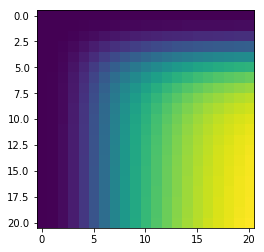

In [37]:
plt.imshow(value_function)

## Policy improvement

In [5]:
def policy_improvement(policy, states, value_function):
    stable = True
    for state in tqdm(states):
        old_action = policy[state[0], state[1]]
        actions = list(range(
            max(-5, -state[0]),
            min(5, state[1]) + 1
        ))
        q = [value_function_given_action(
            state=state,
            action=action,
            value_function=value_function
        ) for action in actions]
        policy[state[0], state[1]] = actions[np.argmax(q)]
        if old_action != policy[state[0], state[1]]:
            stable = False

    return policy, stable

In [39]:
policy, stable = policy_improvement(policy=initial_policy, states=states, value_function=value_function)

100%|██████████| 441/441 [00:47<00:00,  9.27it/s]


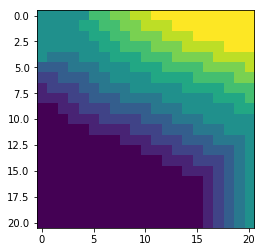

In [40]:
plt.imshow(policy)

## Putting it together

In [6]:
policy = np.zeros((21, 21))
value_function = np.zeros((21, 21))
states = list(product(range(21), range(21)))

# f, axs = plt.subplots(2, 3, figsize=(18, 6))

while True:
    value_function = policy_evaluation(
        policy=policy,
        value_function=value_function,
        states=states)
    policy, stable = policy_improvement(
        policy=policy,
        value_function=value_function,
        states=states)
    if stable:
        break
        

100%|██████████| 441/441 [00:49<00:00,  8.99it/s]


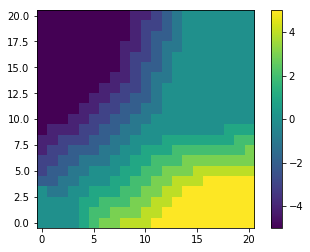

In [7]:
plt.imshow(policy, origin='lower')
plt.colorbar()

Looks a bit different from the plots in the book. Find the bug.

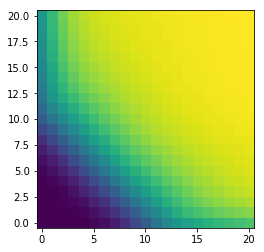

In [11]:
plt.imshow(value_function, origin='lower')